In [25]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [5]:
print(("Head of Train Data"),train_data.head())
print(("Shape of Train Data"), train_data.shape)

Head of Train Data    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500 

In [6]:
print(("Head of Test Data"),test_data.head())
print(("Shape of Test Data"), test_data.shape)

Head of Test Data    PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
Shape of Test Data (418, 11)


In [7]:
# Display basic information about the datasets
print("Train Data Information:")
print(train_data.info())
print("\nTest Data Information:")
print(test_data.info())

Train Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0

In [15]:
# Function to plot pie charts
def plot_pie_chart(df, column, title):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', df[column].nunique()), startangle=140)
    plt.title(title)
    plt.ylabel('')
    plt.show()

In [16]:
# Function to plot heatmaps
def plot_heatmap(df, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()

In [17]:
# Display basic statistics
print("\nTrain Data Description:")
print(train_data.describe())
print("\nTest Data Description:")
print(test_data.describe())


Train Data Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Test Data Description:
       PassengerId      Pclass  

In [18]:
# Check for missing values
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())



Missing Values in Train Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Test Data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


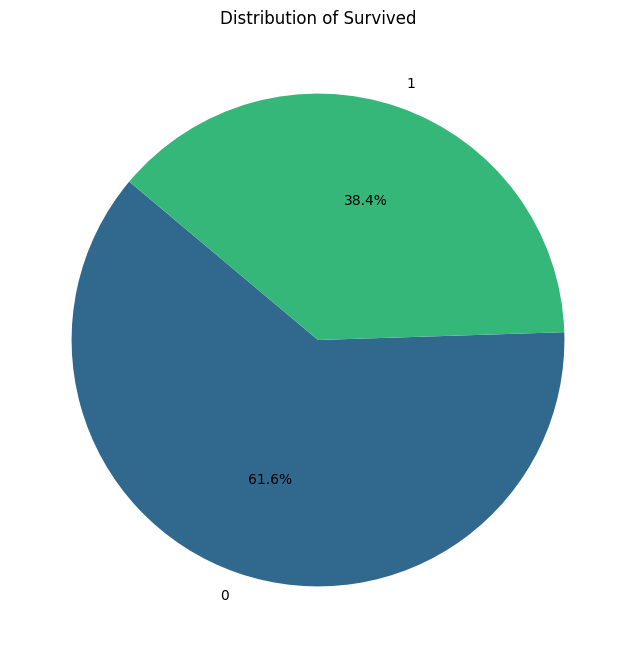

In [19]:
# Visualize the distribution of the target variable 'Survived' in the training set
plot_pie_chart(train_data, 'Survived', 'Distribution of Survived')

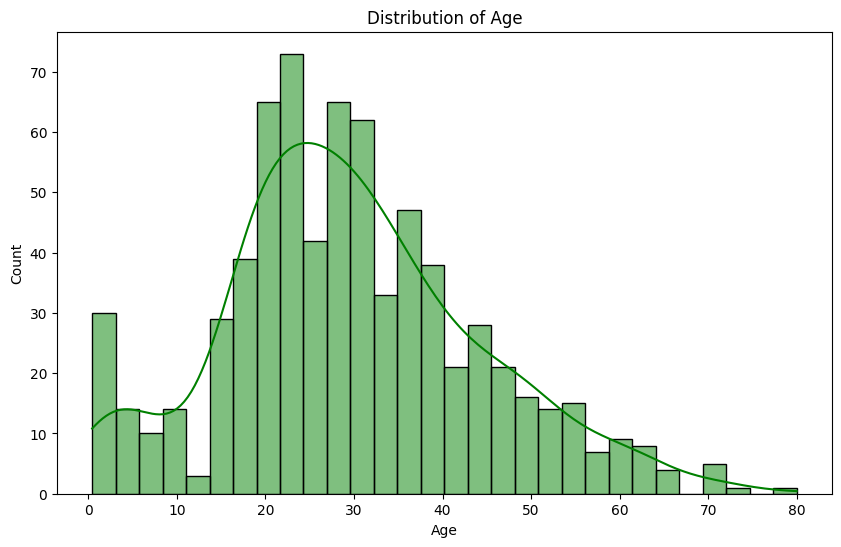

In [20]:
# Visualize the distribution of passengers' ages
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

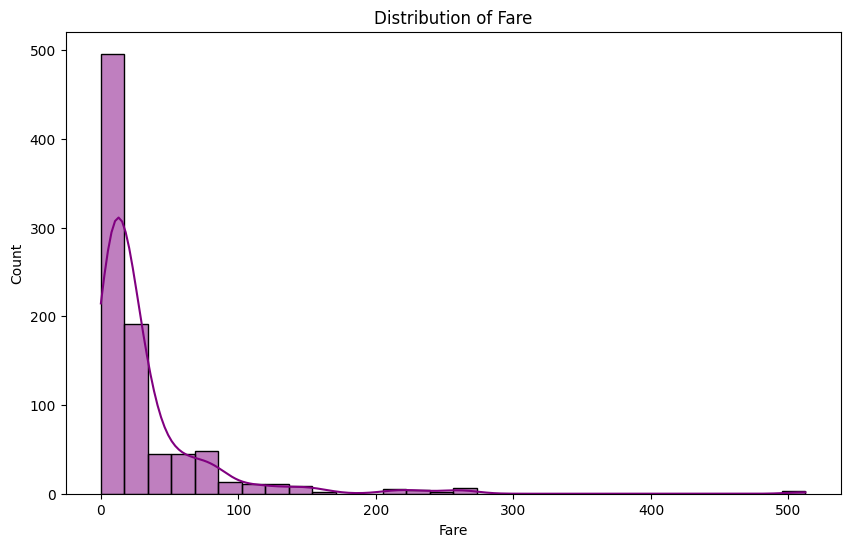

In [21]:
# Visualize the distribution of passengers' fares
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Fare'], bins=30, kde=True, color='purple')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.show()

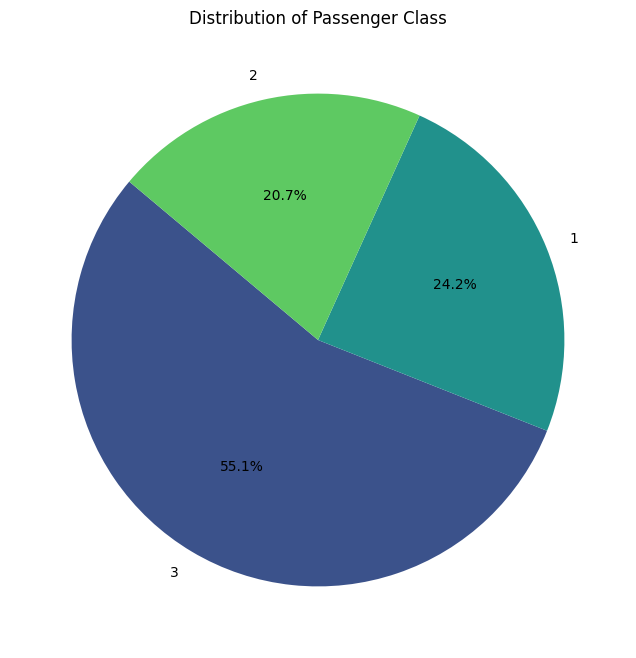

In [22]:
# Visualize the count of passengers in each class
plot_pie_chart(train_data, 'Pclass', 'Distribution of Passenger Class')


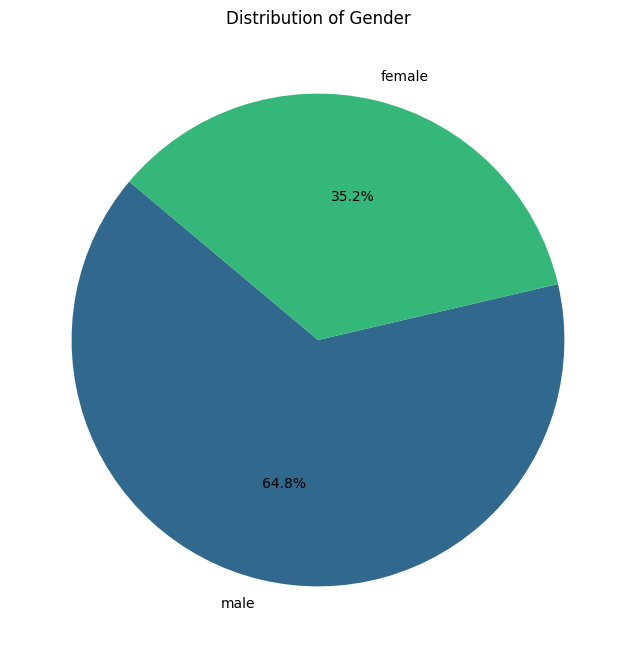

In [23]:
# Visualize the count of passengers by gender
plot_pie_chart(train_data, 'Sex', 'Distribution of Gender')


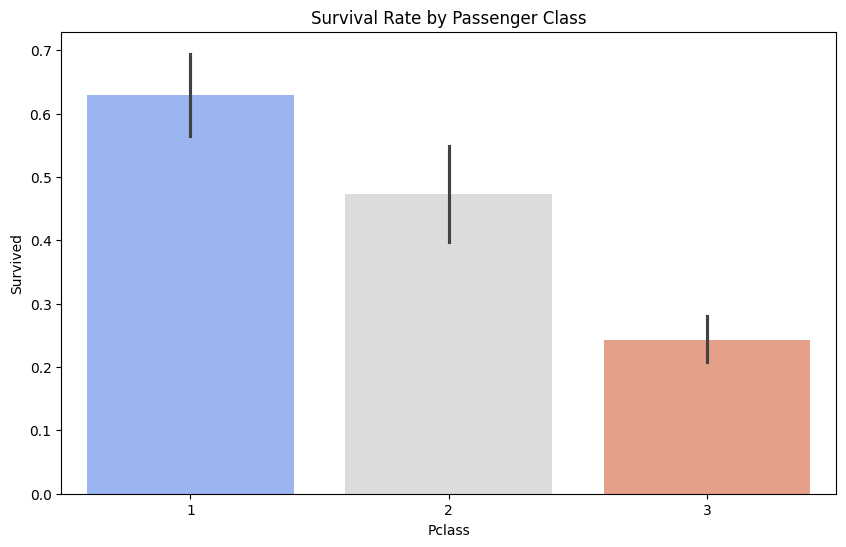

In [26]:
# Visualize the survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data, palette='coolwarm')
plt.title('Survival Rate by Passenger Class')
plt.show()

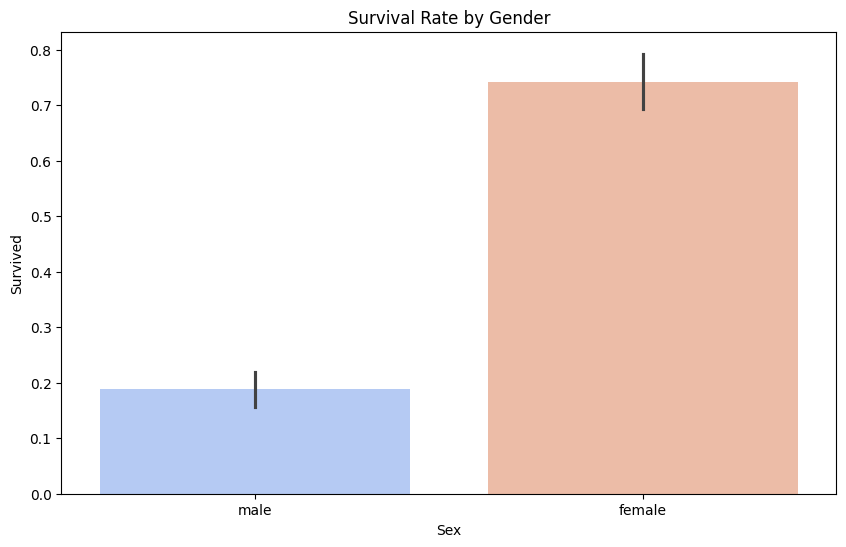

In [27]:
# Visualize the survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train_data, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.show()

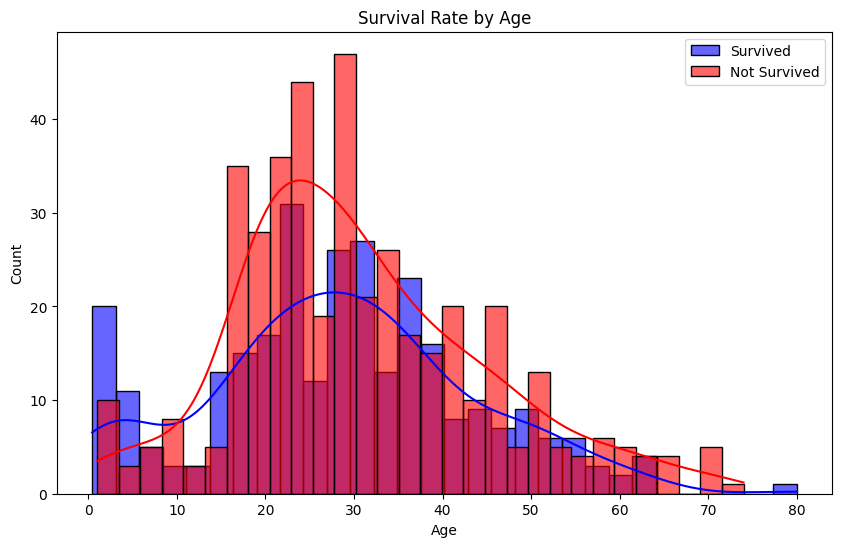

In [28]:
# Visualize the survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(train_data[train_data['Survived'] == 1]['Age'].dropna(), bins=30, kde=True, color='blue', label='Survived', alpha=0.6)
sns.histplot(train_data[train_data['Survived'] == 0]['Age'].dropna(), bins=30, kde=True, color='red', label='Not Survived', alpha=0.6)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.legend()
plt.show()


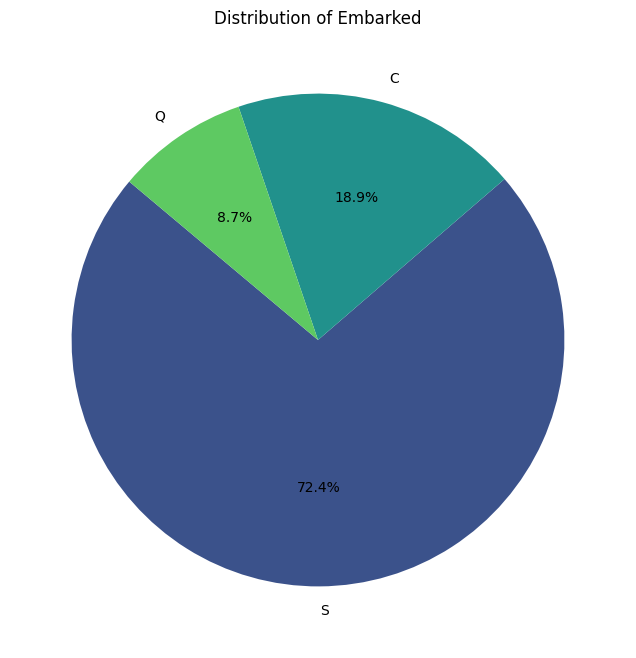

In [29]:
# Visualize the survival rate by embarkation port
plot_pie_chart(train_data, 'Embarked', 'Distribution of Embarked')

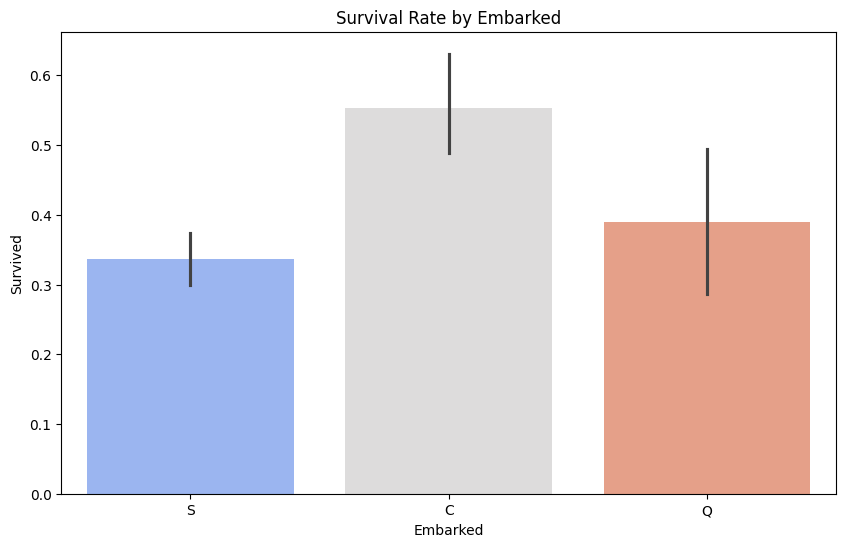

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=train_data, palette='coolwarm')
plt.title('Survival Rate by Embarked')
plt.show()

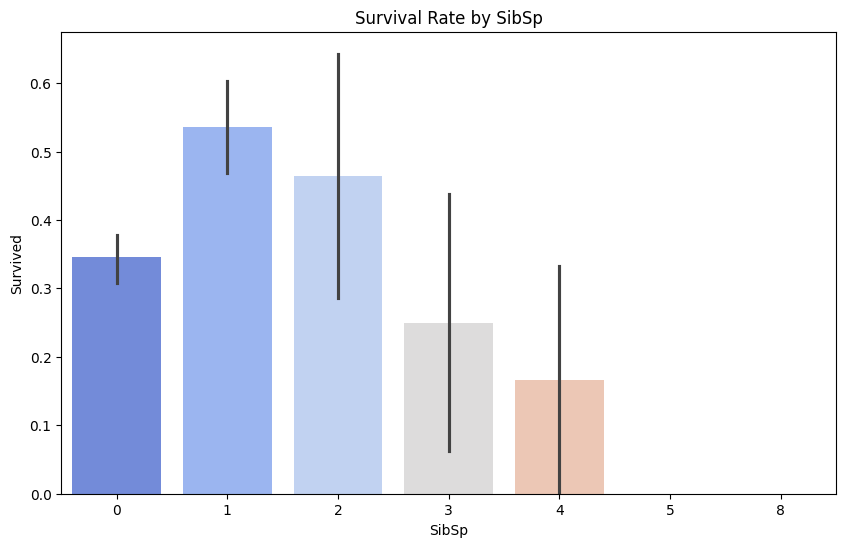

In [31]:
# Visualize survival rate by SibSp
plt.figure(figsize=(10, 6))
sns.barplot(x='SibSp', y='Survived', data=train_data, palette='coolwarm')
plt.title('Survival Rate by SibSp')
plt.show()

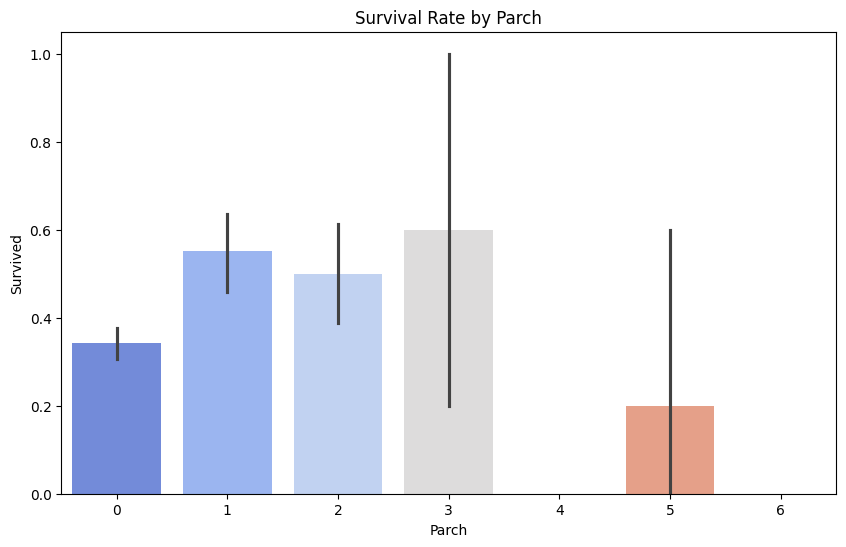

In [32]:
# Visualize survival rate by Parch
plt.figure(figsize=(10, 6))
sns.barplot(x='Parch', y='Survived', data=train_data, palette='coolwarm')
plt.title('Survival Rate by Parch')
plt.show()


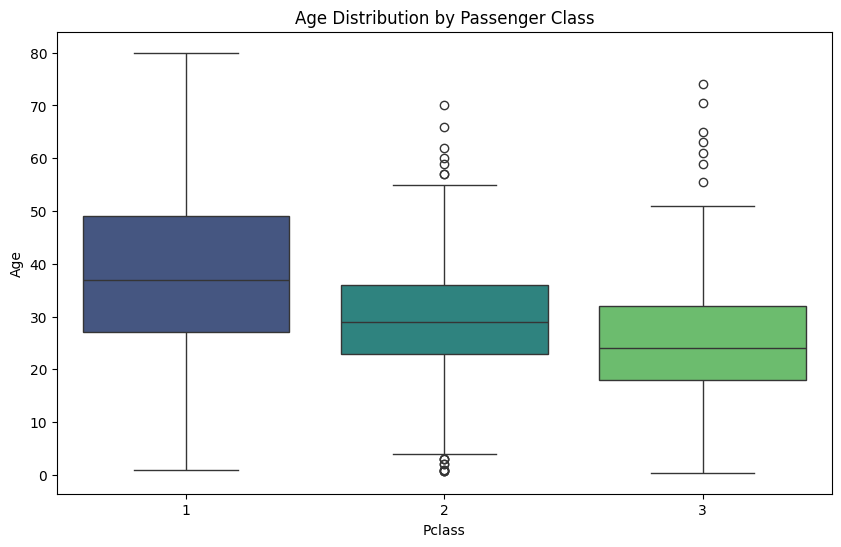

In [33]:
# Box plot of Age by Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=train_data, palette='viridis')
plt.title('Age Distribution by Passenger Class')
plt.show()

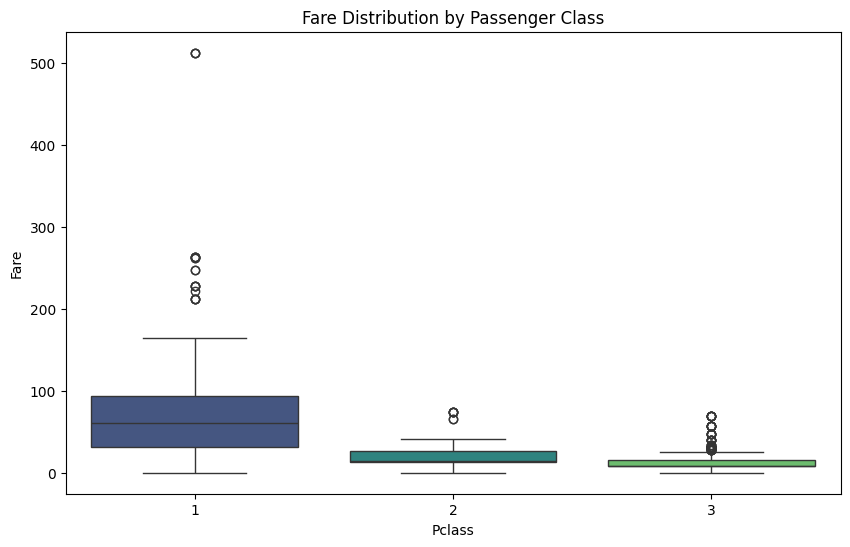

In [35]:
# Box plot of Fare by Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_data, palette='viridis')
plt.title('Fare Distribution by Passenger Class')
plt.show()

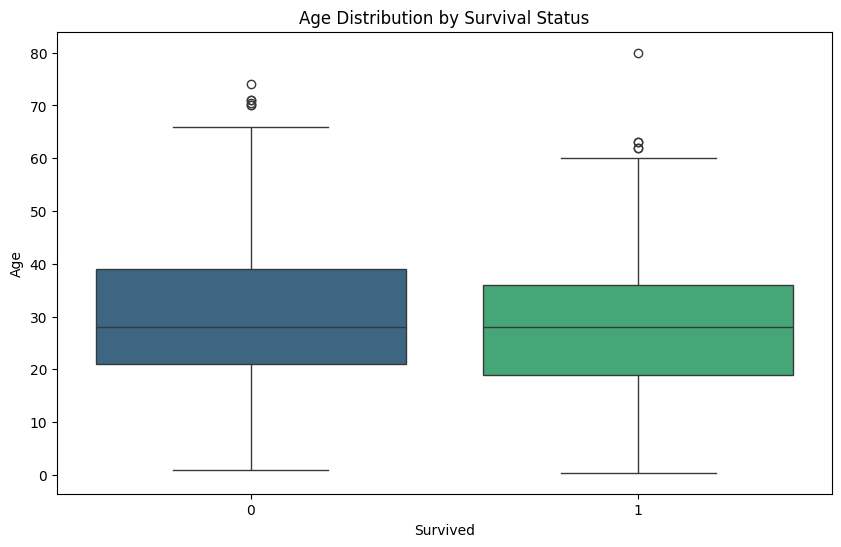

In [40]:
# Box plot of Age by Survived
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=train_data, palette='viridis')
plt.title('Age Distribution by Survival Status')
plt.show()



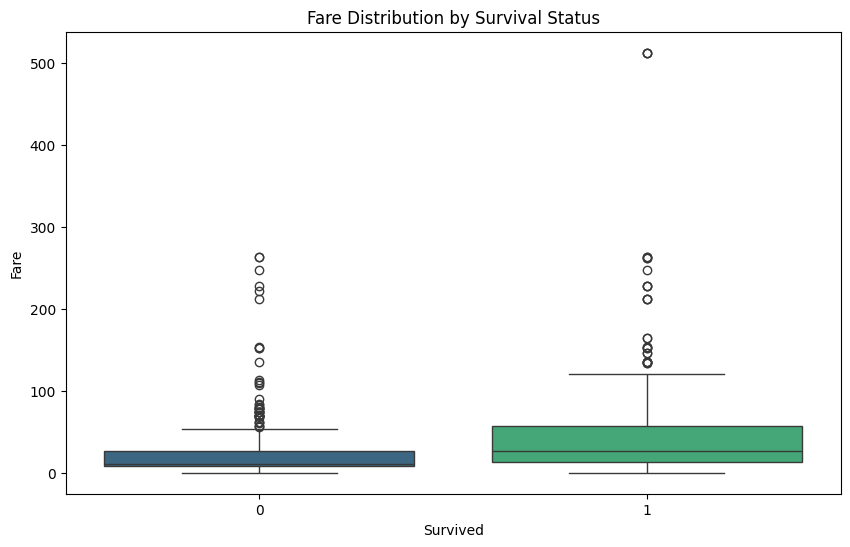

In [41]:
# Box plot of Fare by Survived
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=train_data, palette='viridis')
plt.title('Fare Distribution by Survival Status')
plt.show()

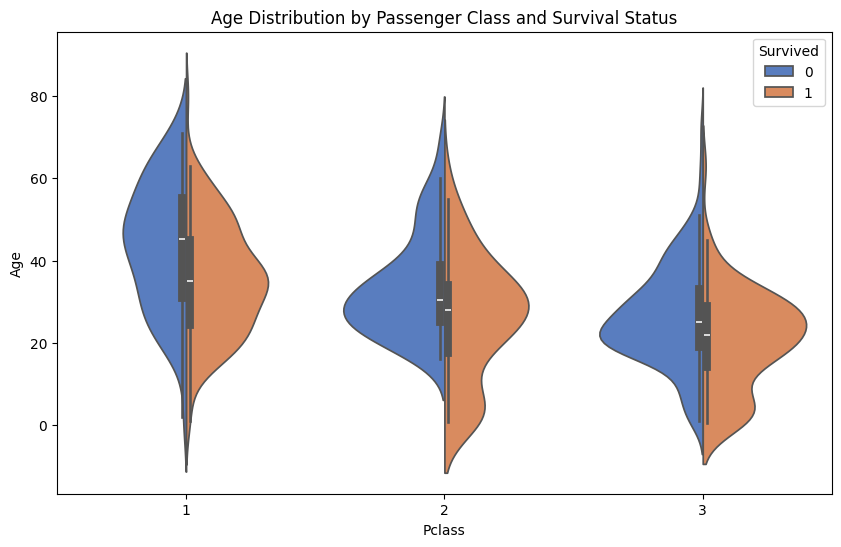

In [37]:
# Violin plot of Age by Pclass and Survival Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_data, palette='muted', split=True)
plt.title('Age Distribution by Passenger Class and Survival Status')
plt.show()

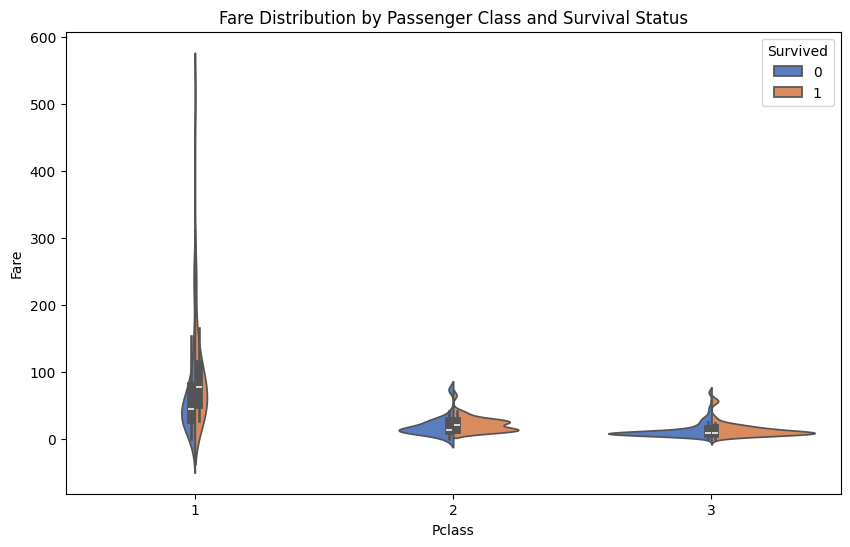

In [38]:
# Violin plot of Fare by Pclass and Survival Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=train_data, palette='muted', split=True)
plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.show()


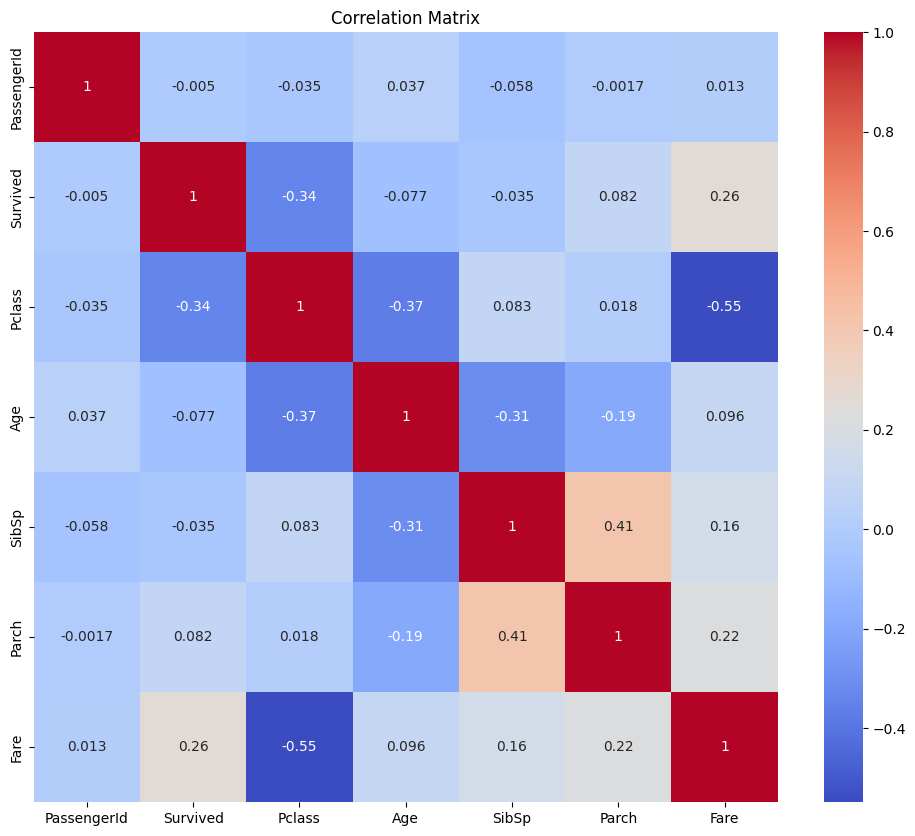

In [42]:
# Visualize the correlation matrix with only numerical columns
numeric_columns = train_data.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(train_data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


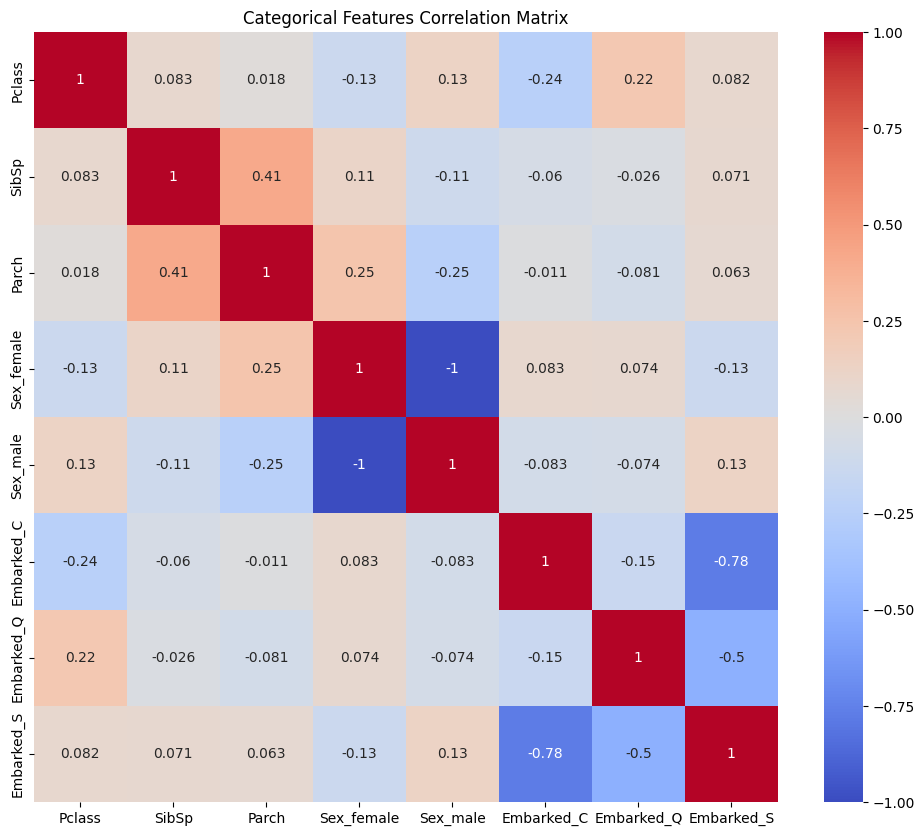

In [43]:
# Heatmap of categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
plt.figure(figsize=(12, 10))
sns.heatmap(pd.get_dummies(train_data[categorical_features]).corr(), annot=True, cmap='coolwarm')
plt.title('Categorical Features Correlation Matrix')
plt.show()


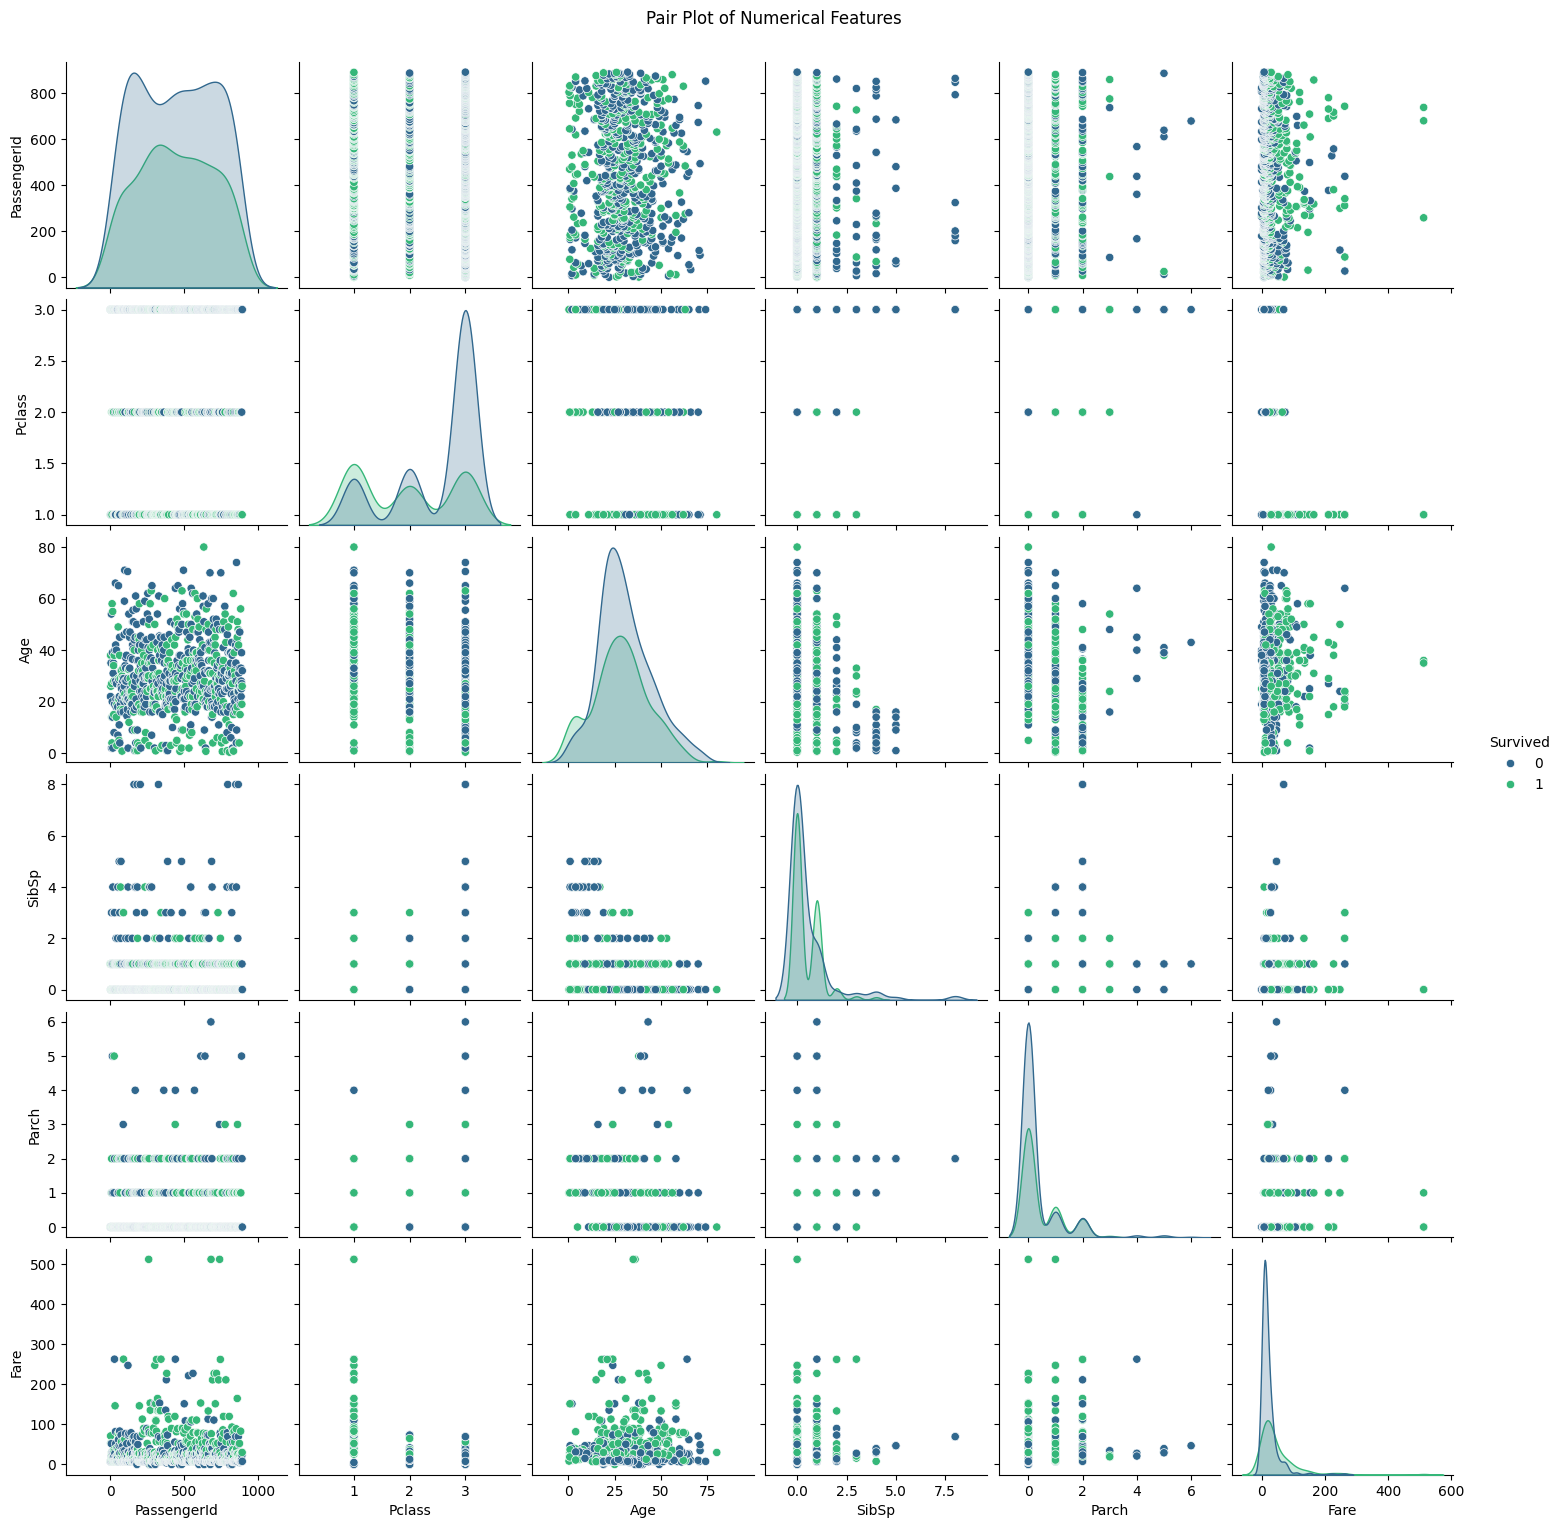

In [44]:
# Pair plot of numerical features
sns.pairplot(train_data, hue='Survived', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()